In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error


In [5]:
df = pd.read_csv("../data/raw/Student_Performance.csv")
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
x = df[["Hours Studied","Previous Scores", "Sample Question Papers Practiced","Sleep Hours"]]
y = df["Performance Index"]

In [7]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
regressor =LinearRegression()


In [9]:
regressor.fit(X_train,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
y_pred_train = regressor.predict(X_train)


In [11]:
residual = y_train - y_pred_train


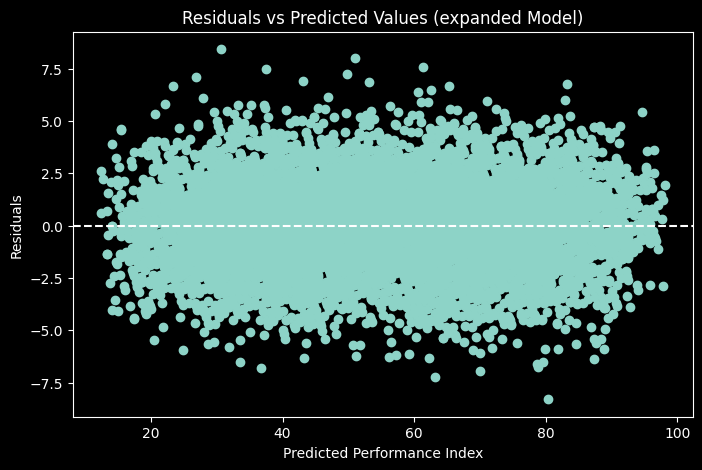

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_train, residual)
plt.axhline(y=0, linestyle="--")
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (expanded Model)")
plt.show()

In [13]:
print(f"r2Score : {r2_score(y_train, y_pred_train)}")
print(f"mseScore : {mean_squared_error(y_train, y_pred_train)}")
print(f"maeScore : {mean_absolute_error(y_train, y_pred_train)}")

r2Score : 0.9884388348325367
mseScore : 4.262289072936617
maeScore : 1.6398241480954339


In [14]:
y_pred_test = regressor.predict(X_test)


In [15]:
print(f"r2Score : {r2_score(y_test, y_pred_test)}")
print(f"mseScore : {mean_squared_error(y_test, y_pred_test)}")
print(f"maeScore : {mean_absolute_error(y_test, y_pred_test)}")

r2Score : 0.9887144552384187
mseScore : 4.182254914593811
maeScore : 1.6296726874197012


Adding Sleep Hours to the model results in a small but consistent improvement in predictive performance. Residual diagnostics suggest that within the observed range, the relationship between sleep and performance can be reasonably approximated as linear. However, the effect size is modest compared to prior academic performance and study-related variables.